In [22]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

In [23]:
def load_flowers_data():
    data_path = 'raw_data/64'
    classes = {'notwaldo':0, 'waldo':1}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((64, 64))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [24]:
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 7072.41it/s]


In [25]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():

    base_model = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(64, 64, 3)
            )

    return base_model

In [26]:
def set_nontrainable_layers(model):
    for layer in model.layers[:-3]:
        layer.trainable = False
    return model

In [27]:
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 4,719,616 (18.00 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

In [28]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = load_model()
    base_model = set_nontrainable_layers(base_model)
    flattening_layer = layers.Flatten()
    dense_layer_one = layers.Dense(256, activation='relu')
    dense_layer_two = layers.Dense(128, activation='relu')
    prediction_layer = layers.Dense(2, activation='sigmoid')

    model = models.Sequential([
    base_model,
    flattening_layer,
    dense_layer_one,
    dense_layer_two,
    prediction_layer
    ])

    return model

In [29]:
from tensorflow.keras import optimizers

adam_opt = optimizers.Adam(learning_rate=0.0001)

def build_model(model):
    model.compile(loss='binary_crossentropy',
              optimizer=adam_opt,
              metrics=['accuracy'])
    return model

In [30]:
base_model = load_model()
model = add_last_layers(base_model)
model = build_model(model)

In [31]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [32]:
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)
X_val_prepr = preprocess_input(X_val)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

base_model = load_model()
model = add_last_layers(base_model)
model = build_model(model)

es = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_val_prepr, y_val),
          callbacks=[es],
          verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.8237 - loss: 2.3445 - val_accuracy: 0.9104 - val_loss: 0.4099
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9577 - loss: 0.3268 - val_accuracy: 0.8657 - val_loss: 0.4587
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9736 - loss: 0.0912 - val_accuracy: 0.9254 - val_loss: 0.3529
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 1.0000 - loss: 0.0418 - val_accuracy: 0.9403 - val_loss: 0.3181
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9403 - val_loss: 0.3271
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9403 - val_loss: 0.3314
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 1.0000 - loss: 7.0608e-04 - val_accuracy: 0.9403 - val_loss: 0.3316
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 1.0000 - loss: 5.0422e-04 - 

In [34]:
import matplotlib as plt
import matplotlib.pyplot as plt

def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

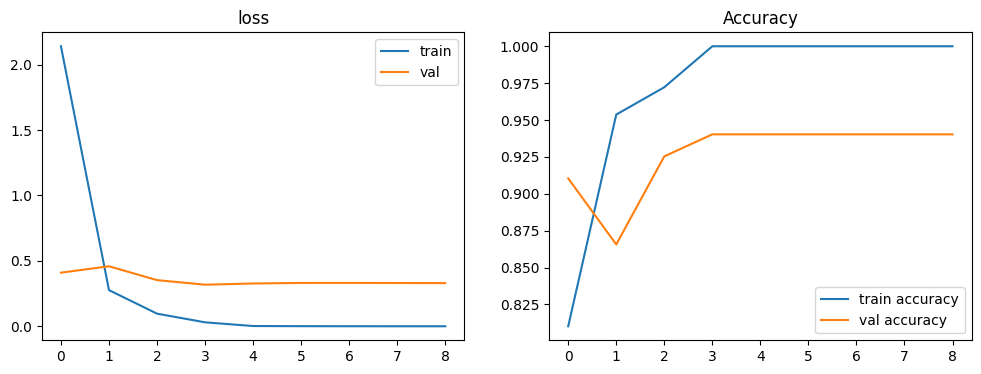

In [35]:
plot_history(history)

In [60]:
model.evaluate(X_test_prepr, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9196 - loss: 0.6040


[0.7242311239242554, 0.9107142686843872]

In [89]:
### Testing single images

im = Image.open(r"raw_data/64/waldo/3_15_1.jpg")
im = np.array(im)
im_test = preprocess_input(im)
im_test = np.expand_dims(im_test,axis=0)

In [90]:
model.predict(im_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.00145509, 0.9803248 ]], dtype=float32)